# Decision Trees

The data has been collected from 2018 FIFA World Cup Russia Official App.

https://www.kaggle.com/mathan/fifa-2018-match-statistics

Attributes:
- Date: Match Date
- Team: Playing Team
- Opponent: Opponent Team
- Goal Scored: Number of goals scored by this team
- Ball Possession %: Amount of time ball was in control by the team
- Attempts: Number of attempts to score goal
- On-Target: Number of shots on-target
- Off-Target: Number of shots that went off-target
- Blocked: Number of opponent team's attempts blocked by the team
- Corners: Number of corner shots used
- Offsides: Number of off-side events
- Free Kicks: Number of free-kicks used
- Saves: Number saves by the goal keeper
- Pass Accuracy %: Percentage of passes that reached the same team player as aimed
- Passes: Total number of passes by the team
- Distance Covered (Kms): Total distance covered by the team members in this game
- Fouls Committed: Number of fouls committed by the team members
- Yellow Card: Number of Yellow warning received
- Yellow & Red: Number of Yellow & Red warning received
- Red: Number of Red cards received
- 1st Goal: When did the team score the 1st goal?
- Round: Stage of the match
- PSO: Was there a penalty shootout (PSO) in this match?
- Goals in PSO: Number of goals scored in the Penalty shootout
- Own goals: Number of own goals
- Own goal Time: When did the team score own goal?


Target:
- Man of the Match: Did a member of Playing Team win Man of the Match?


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# clustering (used for determining how well the
# features are for solving the classification problem)
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure

# classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv('./FIFA 2018 Statistics.csv')
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [3]:
df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [4]:
target = 'Man of the Match'

# Date is not considered an influencing factor in
# winning Man of the Match, so we are excluding it from features
features = (df.columns != target) & (df.columns != 'Date')

## Data Engineering

- Clean NaN values
- Label Encode
- Correlations

In [5]:
# inspect features
df.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 25 columns):
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
1st Goal                  94 non-null 

In [6]:
# Inspect NaN values
df['1st Goal'].unique()

array([12., nan, 89., 90.,  4., 24., 58., 62., 19., 23., 59., 32., 56.,
       35., 20., 50., 65., 47., 11., 39.,  6., 37., 60., 54.,  7., 38.,
       34., 53., 49.,  5., 52., 18., 26., 48.,  8., 78., 40., 10., 45.,
       22., 14., 51., 76., 36., 31., 74., 33., 13., 41., 55.,  1., 69.,
       66., 57., 30., 68., 28.])

In [7]:
mask = df['1st Goal'].isna() # True for rows that have 1st Goal NaN
df[mask] # Subset of df where mask is True

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
12,16-06-2018,Peru,Denmark,0,52,18,6,7,5,3,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN
15,17-06-2018,Nigeria,Croatia,0,46,14,2,5,7,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,32.0
16,17-06-2018,Costa Rica,Serbia,0,50,10,3,3,4,5,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
18,17-06-2018,Germany,Mexico,0,60,25,9,9,7,8,...,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN
23,18-06-2018,Korea Republic,Sweden,0,48,5,0,2,3,5,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
25,18-06-2018,Panama,Belgium,0,39,6,2,4,0,3,...,5,0,0,No,NaN,Group Stage,No,0,NaN,NaN
35,20-06-2018,Morocco,Portugal,0,53,16,4,10,2,7,...,1,0,0,No,NaN,Group Stage,No,0,NaN,NaN


In [8]:
# 1st Goal [12. nan 89. 90.  4. 24. 58. 62. 19. ...
df['1st Goal'].fillna(-1, inplace=True)

In [9]:
# Inspect NaN values
df['Own goals'].unique()

array([nan,  1.])

In [10]:
# Own goals [nan  1.]
df['Own goals'].fillna(0, inplace=True)

In [11]:
# Inspect NaN values
df['Own goal Time'].unique()

array([nan, 90., 81., 32., 37., 47., 23., 74., 33., 12., 13., 18.])

In [12]:
# Own goal Time [nan 90. 81. 32. 37. 47. 23. 74. 33. 12. 13. 18.]
df['Own goal Time'].fillna(-1, inplace=True)

In [13]:
# check that we've filled all the NaNs
df.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 25 columns):
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
1st Goal                  128 non-null

### Label Encode

In [14]:
encoders = dict()

for c in ['Team', 'Opponent', 'Man of the Match', 'Round', 'PSO']:
    encoders[c] = LabelEncoder()
    df[c] = encoders[c].fit_transform(df[c])
    
df[c]

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
98     0
99     0
100    1
101    1
102    1
103    1
104    0
105    0
106    0
107    0
108    0
109    0
110    1
111    1
112    0
113    0
114    0
115    0
116    0
117    0
118    1
119    1
120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
Name: PSO, Length: 128, dtype: int32

In [15]:
encoders['Team'].classes_

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia',
       'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France',
       'Germany', 'Iceland', 'Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Sweden',
       'Switzerland', 'Tunisia', 'Uruguay'], dtype=object)

In [16]:
encoders['Opponent'].classes_

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia',
       'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France',
       'Germany', 'Iceland', 'Iran', 'Japan', 'Korea Republic', 'Mexico',
       'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal',
       'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Sweden',
       'Switzerland', 'Tunisia', 'Uruguay'], dtype=object)

In [17]:
# check outcome after encoding the string columns
df.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 25 columns):
Team                      128 non-null int32
Opponent                  128 non-null int32
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-null int64
1st Goal                  128 non-null f

In [18]:
# Optionally if your data is large, you can
# explore converting some floats to ints
#
# df['Own goals'] = df['Own goals'].astype(int)

In [19]:
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,23,24,5,40,13,7,3,3,6,...,0,0,0,1,12.0,2,0,0,0.0,-1.0
1,14-06-2018,24,23,0,60,6,0,3,3,2,...,0,0,0,0,-1.0,2,0,0,0.0,-1.0
2,15-06-2018,8,31,0,43,8,3,3,2,0,...,2,0,0,0,-1.0,2,0,0,0.0,-1.0
3,15-06-2018,31,8,1,57,14,4,6,4,5,...,0,0,0,1,89.0,2,0,0,0.0,-1.0
4,15-06-2018,17,13,0,64,13,3,6,4,5,...,1,0,0,0,-1.0,2,0,0,1.0,90.0
5,15-06-2018,13,17,1,36,8,2,5,1,2,...,3,0,0,1,90.0,2,0,0,0.0,-1.0
6,15-06-2018,22,27,3,39,8,3,2,3,4,...,1,0,0,0,4.0,2,0,0,0.0,-1.0
7,15-06-2018,27,22,3,61,12,5,5,2,5,...,1,0,0,1,24.0,2,0,0,0.0,-1.0
8,16-06-2018,10,1,2,51,12,5,4,3,5,...,1,0,0,1,58.0,2,0,0,0.0,-1.0
9,16-06-2018,1,10,1,49,4,1,2,1,1,...,3,0,0,0,62.0,2,0,0,1.0,81.0


### Correlations

In [20]:
df.corr()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Team,1.000000,0.088660,-0.083526,-0.112875,-0.140363,-0.101802,-0.134702,-0.091696,-0.152788,-0.009681,...,-0.135829,0.030206,0.023563,-0.038723,-0.045331,-0.055911,-0.043609,-0.037808,0.062979,0.054333
Opponent,0.088660,1.000000,0.073100,0.114178,-0.006657,-0.014810,-0.076006,0.041844,0.076473,0.101905,...,-0.096515,0.196286,0.083351,0.038723,-0.017061,-0.055911,-0.043609,-0.020385,0.051673,0.021145
Goal Scored,-0.083526,0.073100,1.000000,0.034759,0.144915,0.461702,-0.020374,-0.087072,0.040446,0.045105,...,-0.048838,-0.035031,-0.089714,0.522193,0.286212,0.002023,-0.015759,-0.011204,-0.066164,-0.092322
Ball Possession %,-0.112875,0.114178,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,...,-0.205511,0.090924,0.024316,0.110393,-0.064824,-0.001384,-0.002908,-0.010086,0.059499,0.157519
Attempts,-0.140363,-0.006657,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,-0.016508,...,-0.185544,-0.074594,0.009795,0.176425,0.117455,0.190911,0.168314,0.149836,-0.041677,-0.037545
On-Target,-0.101802,-0.014810,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,...,-0.115259,-0.051742,-0.023439,0.291346,0.131279,0.070780,0.067975,0.040322,-0.071880,-0.122310
Off-Target,-0.134702,-0.076006,-0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,-0.095919,...,-0.124094,-0.145577,-0.119332,0.152979,0.097604,0.133148,0.199176,0.185807,-0.092474,-0.028804
Blocked,-0.091696,0.041844,-0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,-0.002231,...,-0.163111,0.033717,0.165295,-0.019582,0.017730,0.181332,0.109547,0.108220,0.074879,0.065942
Corners,-0.152788,0.076473,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,-0.034054,...,-0.169929,0.014543,0.117960,0.173148,0.102158,0.143828,0.069544,0.088997,-0.028876,-0.020923
Offsides,-0.009681,0.101905,0.045105,0.057706,-0.016508,0.073176,-0.095919,-0.002231,-0.034054,1.000000,...,-0.047757,0.228531,-0.036432,0.026288,-0.125376,-0.109338,-0.074664,-0.064892,-0.070461,-0.096825


## Feature Engineering

Explore:
- Feature Selection
- Plot PCA
- Clustering analysis

### SelectKBest

In [21]:
# Use classification test to find best features
# test checks each X with y
X = df.loc[:, features]
y = df[target]

kbest = SelectKBest(f_classif, k=5)

X_kbest = kbest.fit_transform(X, y)

In [22]:
# print the k best columns
# note that this list is not sorted by score, it
# is the original column ordering in X
X.columns[kbest.get_support()]

Index(['Goal Scored', 'Attempts', 'On-Target', 'Corners', '1st Goal'], dtype='object')

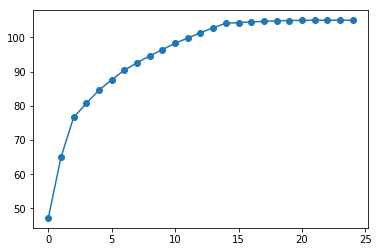

In [23]:
import numpy as np

# sort kbest scores in descending order
kbest_sorted = np.array(sorted(kbest.scores_, reverse=True))

# plot the cumulative sum (sum of scores vs. k)
plt.plot(kbest_sorted.cumsum(), marker='o')

### Plot PCA

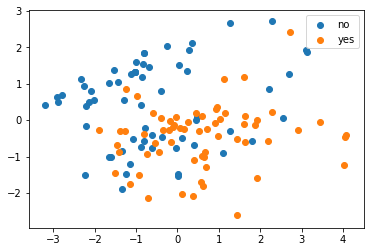

In [24]:
scaler = StandardScaler()

# scaling kbest dataset just to explore for PCA
Z_scaled = scaler.fit_transform(X_kbest)

pca = PCA(n_components=2) # 2 components to plot 2d,
                          # coloured based on yes/no
Z_2d = pca.fit_transform(Z_scaled)

fig, ax = plt.subplots()

# row_selector y==0 (selects all rows where y==0)
# col_selector 0 (selects the 1st column / component)
# Z_2d[y==0, 0]
# plotting 1st vs. 2nd PCA component

ax.scatter(Z_2d[y==0, 0], Z_2d[y==0, 1], label='no') # filter for y==0
ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], label='yes') # filter for y==1
ax.legend()

### Clustering analysis

[Text(0, 0.5, 'Inter-cluster distance'), Text(0.5, 1.0, 'Dendrogram')]

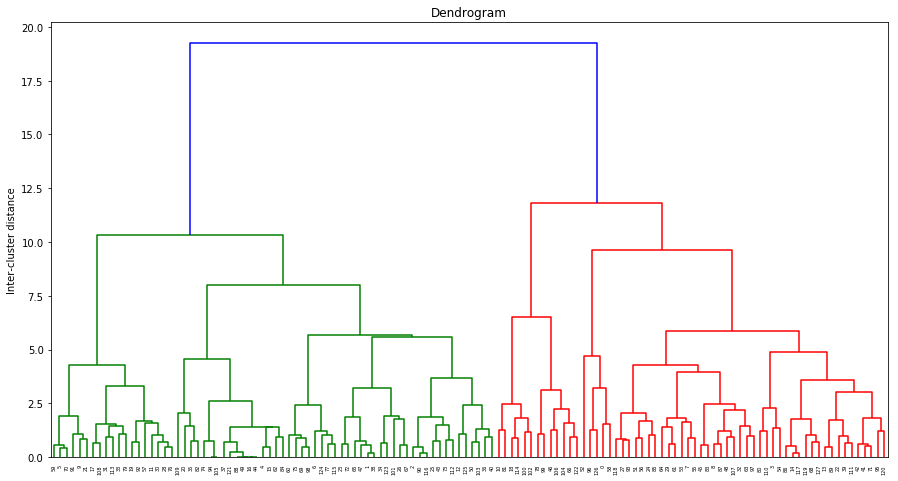

In [25]:
links = linkage(Z_scaled, 'ward')

fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(links, ax=ax)

ax.set(title='Dendrogram', ylabel='Inter-cluster distance')

In [26]:
# 2 clusters to see how well our dataset separates into 2 classes
agg = AgglomerativeClustering(n_clusters=2)
clusters = agg.fit_predict(Z_scaled)

# determines if clusters are quite dense and separated
# If using clustering alone (no labels), use this to decide
# how tight the data is clustering
from sklearn.metrics import silhouette_score
print(silhouette_score(Z_scaled, clusters))

# since we have the labels...
# If using clustering to support classification, use this
# to determine how well data actually clusters according to labels
#
# https://scikit-learn.org/stable/modules/clustering.html#id18
#
print(homogeneity_completeness_v_measure(y, clusters))

0.25377791102626657
(0.1656815972226738, 0.1661500741554808, 0.16591550499334284)


## Model Engineering

- Train/test split
- Train a Decision Tree Classifier
- Evaluation Metrics
- Visualise the decision tree

In [27]:
Z_train, Z_test, y_train, y_test = train_test_split(Z_scaled, y)

In [28]:
from sklearn.model_selection import cross_validate

# define model
model = DecisionTreeClassifier()

# cross validate
scores = cross_validate(model, Z_train, y_train, cv=5,
                        return_train_score=True,
                        return_estimator=True)

In [29]:
scores

{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'estimator': (DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'),
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, mi

In [30]:
# based on test_score (= cross validation score), selected best model

# find the index of the highest validation score
best_model_index = scores['test_score'].argmax()

# use the index to find the best model
best_model = scores['estimator'][best_model_index]

In [31]:
y_pred = best_model.predict(Z_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.59      0.67      0.62        15

   micro avg       0.62      0.62      0.62        32
   macro avg       0.63      0.63      0.62        32
weighted avg       0.63      0.62      0.62        32

[[10  7]
 [ 5 10]]


In [32]:
# how much information gain is accounted for by each feature
best_model.feature_importances_

array([0.07917229, 0.18926064, 0.1088619 , 0.05392488, 0.5687803 ])

In [33]:
# get the column names for the features used to fit
# the decision tree

# This is just to get the names of the columns,
# the feature importances of decision tree is unrelated.
X.columns[kbest.get_support()]

Index(['Goal Scored', 'Attempts', 'On-Target', 'Corners', '1st Goal'], dtype='object')

### Visualise the Decision Tree

In [35]:
# Requires graphviz to be installed with class setup instructions

# if you get an error about dot, check that you don't have
# the old .pdf open somewhere

from sklearn.tree import export_graphviz
import graphviz

filename = 'dtc_fifa.dot'
export_graphviz(best_model,
                out_file=filename,
                feature_names=X.columns[kbest.get_support()],
                filled=True,
                rounded=True)

source = graphviz.Source.from_file(filename)
source.render(view=True)

'dtc_fifa.dot.pdf'